# <font color="red">Data pre-processing and exploration activities with the Global Shark Attack File</font>

## <font color="Dodgerblue">Data Cleaning and Prep Challenge 1</font>

## <font color="green">Research objective : Binned Time of attack for USA attacks (by state, region, overall)</font>

### Group 3

#### <b>Group Members :</b>
- <b>Bharadwaj Aryasomayajula</b>
 
 
- <b>Mahanth Mukesh</b>
 
 
- <b>Akhil Morampudi</b>
 
 
- <b>Ravi Theja Goalla</b>


In [60]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the dataset file

In [61]:
df = pd.read_excel('GSAF5-1.xls')

### The below methods are used to delete all the leading and trailing characters mentioned in its argument.

In [62]:
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()

In [63]:
#to get a quick overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 24 columns):
Case Number               8739 non-null object
Date                      6451 non-null object
Year                      6449 non-null float64
Type                      6447 non-null object
Country                   6401 non-null object
Area                      5988 non-null object
Location                  5904 non-null object
Activity                  5901 non-null object
Name                      6241 non-null object
Sex                       5886 non-null object
Age                       3586 non-null object
Injury                    6423 non-null object
Fatal (Y/N)               5905 non-null object
Time                      3064 non-null object
Species                   3545 non-null object
Investigator or Source    6434 non-null object
pdf                       6451 non-null object
href formula              6449 non-null object
href                      6451 non-null obje

In [64]:
df.head()

Case Number         Date    Year        Type Country     Area  \
0  2019.08.27  27-Aug-2019  2019.0    Provoked     USA  Florida   
1  2019.08.21  21-Aug-2019  2019.0  Unprovoked     USA  Florida   
2  2019.08.20  20-Aug-2019  2019.0  Unprovoked     USA   Hawaii   
3  2019.08.16  16-Aug-2019  2019.0  Unprovoked     USA  Florida   
4  2019.08.11  11-Aug-2019  2019.0  Unprovoked     USA   Hawaii   

                                          Location  Activity  \
0                 New Smyrna Beach, Volusia County   Surfing   
1                  Fort Lauderdale, Broward County    Wading   
2  Napoopoo Park in Kealakekua Bay, The Big Island  Swimming   
3                 New Smyrna Beach, Volusia County    Wading   
4                               Makaha Beach, Oahu   Surfing   

                 Name Sex     ...               Species  \
0        Donald Walsh   M     ...            6.5' shark   
1  Christian Mariani    M     ...                   NaN   
2              female   F     ...                   NaN   
3         Maggie Crum   M     ...                   NaN   
4      Max Keliikipi    M     ...      10' to 12' shark   

            Investigator or Source                       pdf  \
0  K. McMurray, TrackingSharks.com      2019.08.27-Walsh.pdf   
1  K. McMurray, TrackingSharks.com    2019.08.21-Mariani.pdf   
2       Hawaii News Now, 8/20/2019     2019.08.20-Hawaii.pdf   
3                  WESH, 8/16/2019       2019.08.16-Crum.pdf   
4              M. Michaelson, GSAF  2019.08.11-Keliikipi.pdf   

                                        href formula  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...   
1  http://sharkattackfile.net/spreadsheets/pdf_di...   
2  http://sharkattackfile.net/spreadsheets/pdf_di...   
3  http://sharkattackfile.net/spreadsheets/pdf_di...   
4  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                href Case Number.1  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...    2019.08.27   
1  http://sharkattackfile.net/spreadsheets/pdf_di...    2019.08.21   
2  http://sharkattackfile.net/spreadsheets/pdf_di...    2019.08.20   
3  http://sharkattackfile.net/spreadsheets/pdf_di...    2019.08.16   
4  http://sharkattackfile.net/spreadsheets/pdf_di...    2019.08.11   

  Case Number.2 original order Unnamed: 22 Unnamed: 23  
0    2019.08.27         6452.0         NaN         NaN  
1    2019.08.21         6451.0         NaN         NaN  
2    2019.08.20         6450.0         NaN         NaN  
3    2019.08.16         6449.0         NaN         NaN  
4    2019.08.11         6448.0         NaN         NaN  

[5 rows x 24 columns]

In [65]:
#Select the data from the dataset where country is USA and all the data no less than 1995
df=df[df.Year>1999]
df=df[df.Country=='USA']

In [66]:
df.info

<bound method DataFrame.info of        Case Number         Date    Year          Type Country            Area  \
0       2019.08.27  27-Aug-2019  2019.0      Provoked     USA         Florida   
1       2019.08.21  21-Aug-2019  2019.0    Unprovoked     USA         Florida   
2       2019.08.20  20-Aug-2019  2019.0    Unprovoked     USA          Hawaii   
3       2019.08.16  16-Aug-2019  2019.0    Unprovoked     USA         Florida   
4       2019.08.11  11-Aug-2019  2019.0    Unprovoked     USA          Hawaii   
5       2019.08.04  04-Aug-2019  2019.0    Unprovoked     USA         Florida   
6     2019.08.03.c  03-Aug-2019  2019.0    Unprovoked     USA         Florida   
7     2019.08.03.b  03-Aug-2019  2019.0    Unprovoked     USA         Florida   
8     2019.08.03.a  03-Aug-2019  2019.0    Unprovoked     USA         Florida   
9       2019.07.30  30-Jul-2019  2019.0      Provoked     USA  North Carolina   
10      2019.07.29  29-Jul-2019  2019.0    Unprovoked     USA         Florida

In [67]:
#Capitalize all the entities present in Area Column to Upper case
df.Area= [x.upper() for x in df.Area.tolist()]
df.Area

0              FLORIDA
1              FLORIDA
2               HAWAII
3              FLORIDA
4               HAWAII
5              FLORIDA
6              FLORIDA
7              FLORIDA
8              FLORIDA
9       NORTH CAROLINA
10             FLORIDA
12             FLORIDA
13             FLORIDA
14        RHODE ISLAND
15             FLORIDA
17      NORTH CAROLINA
18             FLORIDA
23             FLORIDA
27      NORTH CAROLINA
28             GEORGIA
29      NORTH CAROLINA
32      NORTH CAROLINA
34              HAWAII
36          NEW JERSEY
37              HAWAII
40          CALIFORNIA
42             FLORIDA
44              HAWAII
45             FLORIDA
46             FLORIDA
             ...      
2163           FLORIDA
2164           FLORIDA
2165    NORTH CAROLINA
2166           FLORIDA
2168           FLORIDA
2169           FLORIDA
2170    NORTH CAROLINA
2171    NORTH CAROLINA
2176           FLORIDA
2177           FLORIDA
2178             TEXAS
2179    NORTH CAROLINA
2180       

### Binning of Areas into various regions depending on the coastal region they are located

- Description of the Regions
 -  Atlantic: the states whose land frontiers are the coastal Regions lying on the Atlantic Coast
 -  Pacific: the states whose land frontiers are the coastal Regions lying on the Pacific Coast
 -  Gulf:the states whose land frontiers are the coastal Regions lying on the Gulf coast 

In [68]:
atlantic= ['florida', 'north carolina', 'rhode island','georgia', 'new jersey', 'massachusetts', 'maryland', 'new york', 'south carolina', 'washington', 'delaware', 'puerto rico', 'maine',
       'virginia', 'us virgin islands', 'guam', 'south carolina ', ]

gulf=['texas', 'alabama', 'louisiana', 'new mexico']


pacific=['Hawaii','california', 'oregon', 'palmyra atoll', 'johnston atoll', 'alaska']

#Capitalize all the strings present in the above list and store them into Atlantic region
atlantic = [x.upper() for x in atlantic]

#Capitalize all the strings present in the above list and store them into Pacific region
gulf = [x.upper() for x in gulf]

#Capitalize all the strings present in the above list and store them into Gulf region
pacific = [x.upper() for x in pacific]

### This function takes Area values and groups it to the respective regions.

In [69]:
def get_region(x):
    if x in atlantic:
        return "atlantic"
    elif x in gulf:
        return "gulf"
    elif x in pacific:
        return "pacific"

df['Region'] = df['Area'].apply(lambda x: get_region(x))

In [70]:
#Binning of the data according to regions
df['Region']

0       atlantic
1       atlantic
2        pacific
3       atlantic
4        pacific
5       atlantic
6       atlantic
7       atlantic
8       atlantic
9       atlantic
10      atlantic
12      atlantic
13      atlantic
14      atlantic
15      atlantic
17      atlantic
18      atlantic
23      atlantic
27      atlantic
28      atlantic
29      atlantic
32      atlantic
34       pacific
36      atlantic
37       pacific
40       pacific
42      atlantic
44       pacific
45      atlantic
46      atlantic
          ...   
2163    atlantic
2164    atlantic
2165    atlantic
2166    atlantic
2168    atlantic
2169    atlantic
2170    atlantic
2171    atlantic
2176    atlantic
2177    atlantic
2178        gulf
2179    atlantic
2180    atlantic
2181    atlantic
2182    atlantic
2183    atlantic
2187    atlantic
2188    atlantic
2189        gulf
2190        gulf
2191        gulf
2192    atlantic
2198    atlantic
2199    atlantic
2200    atlantic
2202    atlantic
2203    atlantic
2210        gu

### Show the counts of observations in each categorical region bins using bars

In [71]:
sns.countplot(x='Region', data=df)

<b> As per the above plt, it can be primarily inferred that the Shark Attacks are predominant in the Atlantic region.</b>

#### Categorical Variables

According to the below inference the categorical variables present in the dataset are as follows:
- Type
- Country
- Area
- Location
- Activity


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 0 to 2218
Data columns (total 25 columns):
Case Number               1087 non-null object
Date                      1087 non-null object
Year                      1087 non-null float64
Type                      1087 non-null object
Country                   1087 non-null object
Area                      1087 non-null object
Location                  1080 non-null object
Activity                  1036 non-null object
Name                      1077 non-null object
Sex                       1059 non-null object
Age                       872 non-null object
Injury                    1087 non-null object
Fatal (Y/N)               1023 non-null object
Time                      900 non-null object
Species                   676 non-null object
Investigator or Source    1085 non-null object
pdf                       1087 non-null object
href formula              1087 non-null object
href                      1087 non-null object
Ca

In [73]:
df.head()

Case Number         Date    Year        Type Country     Area  \
0  2019.08.27  27-Aug-2019  2019.0    Provoked     USA  FLORIDA   
1  2019.08.21  21-Aug-2019  2019.0  Unprovoked     USA  FLORIDA   
2  2019.08.20  20-Aug-2019  2019.0  Unprovoked     USA   HAWAII   
3  2019.08.16  16-Aug-2019  2019.0  Unprovoked     USA  FLORIDA   
4  2019.08.11  11-Aug-2019  2019.0  Unprovoked     USA   HAWAII   

                                          Location  Activity  \
0                 New Smyrna Beach, Volusia County   Surfing   
1                  Fort Lauderdale, Broward County    Wading   
2  Napoopoo Park in Kealakekua Bay, The Big Island  Swimming   
3                 New Smyrna Beach, Volusia County    Wading   
4                               Makaha Beach, Oahu   Surfing   

                 Name Sex    ...              Investigator or Source  \
0        Donald Walsh   M    ...     K. McMurray, TrackingSharks.com   
1  Christian Mariani    M    ...     K. McMurray, TrackingSharks.com   
2              female   F    ...          Hawaii News Now, 8/20/2019   
3         Maggie Crum   M    ...                     WESH, 8/16/2019   
4      Max Keliikipi    M    ...                 M. Michaelson, GSAF   

                        pdf  \
0      2019.08.27-Walsh.pdf   
1    2019.08.21-Mariani.pdf   
2     2019.08.20-Hawaii.pdf   
3       2019.08.16-Crum.pdf   
4  2019.08.11-Keliikipi.pdf   

                                        href formula  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...   
1  http://sharkattackfile.net/spreadsheets/pdf_di...   
2  http://sharkattackfile.net/spreadsheets/pdf_di...   
3  http://sharkattackfile.net/spreadsheets/pdf_di...   
4  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                href Case Number.1  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...    2019.08.27   
1  http://sharkattackfile.net/spreadsheets/pdf_di...    2019.08.21   
2  http://sharkattackfile.net/spreadsheets/pdf_di...    2019.08.20   
3  http://sharkattackfile.net/spreadsheets/pdf_di...    2019.08.16   
4  http://sharkattackfile.net/spreadsheets/pdf_di...    2019.08.11   

  Case Number.2 original order Unnamed: 22 Unnamed: 23    Region  
0    2019.08.27         6452.0         NaN         NaN  atlantic  
1    2019.08.21         6451.0         NaN         NaN  atlantic  
2    2019.08.20         6450.0         NaN         NaN   pacific  
3    2019.08.16         6449.0         NaN         NaN  atlantic  
4    2019.08.11         6448.0         NaN         NaN   pacific  

[5 rows x 25 columns]

In [74]:
#count the number of Null Vaslues
df.isna().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                      0
Area                         0
Location                     7
Activity                    51
Name                        10
Sex                         28
Age                        215
Injury                       0
Fatal (Y/N)                 64
Time                       187
Species                    411
Investigator or Source       2
pdf                          0
href formula                 0
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               1086
Unnamed: 23               1087
Region                       1
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 0 to 2218
Data columns (total 25 columns):
Case Number               1087 non-null object
Date                      1087 non-null object
Year                      1087 non-null float64
Type                      1087 non-null object
Country                   1087 non-null object
Area                      1087 non-null object
Location                  1080 non-null object
Activity                  1036 non-null object
Name                      1077 non-null object
Sex                       1059 non-null object
Age                       872 non-null object
Injury                    1087 non-null object
Fatal (Y/N)               1023 non-null object
Time                      900 non-null object
Species                   676 non-null object
Investigator or Source    1085 non-null object
pdf                       1087 non-null object
href formula              1087 non-null object
href                      1087 non-null object
Ca

In [76]:
#Use regular expression to extract the Time only in hours in 24 Hr Time format and negating all other time data
df['Hour_Clean'] = df['Time'].str.extract("([0-9]+[h])", expand=False)

In [77]:
#Replace occurrences of pattern/regex in the Series/Index with some other string
df['Hour_Clean']=df['Hour_Clean'].str.replace("h","")
df['Hour_Clean']

0        11
1        09
2        08
3        11
4        19
5        15
6        16
7        15
8       NaN
9       NaN
10       13
12       16
13      NaN
14       18
15      NaN
17       16
18       07
23       16
27       16
28       09
29       14
32       12
34       08
36      NaN
37       08
40      NaN
42       18
44       08
45       17
46       17
       ... 
2163     16
2164     16
2165    NaN
2166    NaN
2168    NaN
2169    NaN
2170    NaN
2171    NaN
2176     15
2177     18
2178    NaN
2179     16
2180     18
2181     12
2182     17
2183     14
2187     07
2188     14
2189     16
2190     06
2191     06
2192     14
2198     11
2199     14
2200    NaN
2202     11
2203     14
2210     16
2211    NaN
2218    NaN
Name: Hour_Clean, Length: 1087, dtype: object

In [78]:
#Calculate the mode of the Time column in the dataset and replace the missing the values with the mode
print("The Nan Value can be replaced by the mode of the data, which is", df.Hour_Clean.mode().values)

The Nan Value can be replaced by the mode of the data, which is ['11']


In [79]:
#Convert argument to a numeric type.The default return dtype is float64 or int64 depending on the data supplied.
df['Hour_Clean'] = pd.to_numeric(df['Hour_Clean'], errors='coerce').fillna(11).astype(np.int64)

In [80]:
df['Hour_Clean'].head(10)

0    11
1     9
2     8
3    11
4    19
5    15
6    16
7    15
8    11
9    11
Name: Hour_Clean, dtype: int64

In [81]:
df['Hour_Clean'].describe()

count    1087.000000
mean       12.617295
std         3.044603
min         0.000000
25%        11.000000
50%        11.000000
75%        15.000000
max        23.000000
Name: Hour_Clean, dtype: float64

## Binning of Time into various bins depending on the time ranges in a day

Description of the Bin labels as per 24 HH clock format

- 00 - 05 : mid night
- 05 - 11 : morning
- 12 - 15 : afternoon
- 15 - 19 : evening
- 19 - 25 : night



In [82]:
bins = [-1, 5, 11, 15, 19, 25]
df['binned'] = pd.cut(df['Hour_Clean'], bins=bins, labels = ['mid night', 'morning' ,'afternoon' ,'evening' ,'night'])

In [83]:
df

Case Number         Date    Year          Type Country            Area  \
0       2019.08.27  27-Aug-2019  2019.0      Provoked     USA         FLORIDA   
1       2019.08.21  21-Aug-2019  2019.0    Unprovoked     USA         FLORIDA   
2       2019.08.20  20-Aug-2019  2019.0    Unprovoked     USA          HAWAII   
3       2019.08.16  16-Aug-2019  2019.0    Unprovoked     USA         FLORIDA   
4       2019.08.11  11-Aug-2019  2019.0    Unprovoked     USA          HAWAII   
5       2019.08.04  04-Aug-2019  2019.0    Unprovoked     USA         FLORIDA   
6     2019.08.03.c  03-Aug-2019  2019.0    Unprovoked     USA         FLORIDA   
7     2019.08.03.b  03-Aug-2019  2019.0    Unprovoked     USA         FLORIDA   
8     2019.08.03.a  03-Aug-2019  2019.0    Unprovoked     USA         FLORIDA   
9       2019.07.30  30-Jul-2019  2019.0      Provoked     USA  NORTH CAROLINA   
10      2019.07.29  29-Jul-2019  2019.0    Unprovoked     USA         FLORIDA   
12    2019.07.27.b  27-Jul-2019  2019.0    Unprovoked     USA         FLORIDA   
13    2019.07.27.a  27-Jul-2019  2019.0    Unprovoked     USA         FLORIDA   
14      2019.07.22  22-Jul-2019  2019.0    Unprovoked     USA    RHODE ISLAND   
15      2019.07.18  18-Jul-2019  2019.0   Unconfirmed     USA         FLORIDA   
17      2019.07.16  16-Jul-2019  2019.0    Unprovoked     USA  NORTH CAROLINA   
18      2019.07.12  12-Jul-2019  2019.0    Unprovoked     USA         FLORIDA   
23      2019.06.30  30-Jun-2019  2019.0    Unprovoked     USA         FLORIDA   
27    2019.06.16.b  16-Jun-2019  2019.0    Unprovoked     USA  NORTH CAROLINA   
28    2019.06.16.a  16-Jun-2019  2019.0    Unprovoked     USA         GEORGIA   
29      2019.06.10  10-Jun-2019  2019.0    Unprovoked     USA  NORTH CAROLINA   
32      2019.06.02  02-Jun-2019  2019.0    Unprovoked     USA  NORTH CAROLINA   
34    2019.05.25.b  25-May-2019  2019.0    Unprovoked     USA          HAWAII   
36      2019.05.20  20-May-2019  2019.0    Unprovoked     USA      NEW JERSEY   
37    2019.05.14.b  14-May-2019  2019.0    Unprovoked     USA          HAWAII   
40      2019.05.07  07-May-2019  2019.0    Unprovoked     USA      CALIFORNIA   
42      2019.05.01  01-May-2019  2019.0    Unprovoked     USA         FLORIDA   
44      2019.04.23  23-Apr-2019  2019.0    Unprovoked     USA          HAWAII   
45      2019.04.21  21-Apr-2019  2019.0    Unprovoked     USA         FLORIDA   
46      2019.04.12  12-Apr-2019  2019.0  Questionable     USA         FLORIDA   
...            ...          ...     ...           ...     ...             ...   
2163    2000.08.13  13-Aug-2000  2000.0    Unprovoked     USA         FLORIDA   
2164    2000.08.12  12-Aug-2000  2000.0    Unprovoked     USA         FLORIDA   
2165    2000.08.11  11-Aug-2000  2000.0       Invalid     USA  NORTH CAROLINA   
2166    2000.08.10  10-Aug-2000  2000.0       Invalid     USA         FLORIDA   
2168    2000.07.25  25-Jul-2000  2000.0    Unprovoked     USA         FLORIDA   
2169    2000.07.22  22-Jul-2000  2000.0    Unprovoked     USA         FLORIDA   
2170    2000.07.17  17-Jul-2000  2000.0    Unprovoked     USA  NORTH CAROLINA   
2171  2000.07.16.b  16-Jul-2000  2000.0    Unprovoked     USA  NORTH CAROLINA   
2176    2000.07.10  10-Jul-2000  2000.0    Unprovoked     USA         FLORIDA   
2177    2000.07.09  09-Jul-2000  2000.0    Unprovoked     USA         FLORIDA   
2178    2000.07.07  07-Jul-2000  2000.0    Unprovoked     USA           TEXAS   
2179    2000.07.06  06-Jul-2000  2000.0    Unprovoked     USA  NORTH CAROLINA   
2180  2000.07.04.b  04-Jul-2000  2000.0    Unprovoked     USA         FLORIDA   
2181  2000.07.04.a  04-Jul-2000  2000.0    Unprovoked     USA         FLORIDA   
2182  2000.07.02.b  02-Jul-2000  2000.0    Unprovoked     USA         FLORIDA   
2183  2000.07.02.a  02-Jul-2000  2000.0    Unprovoked     USA         FLORIDA   
2187    2000.06.19  19-Jun-2000  2000.0    Unprovoked     USA         FLORIDA   
2188    2000.06.13  13-Jun-2000  2000.

### Show the counts of observations in two categorical varibles: region bins based on the binning time using bars

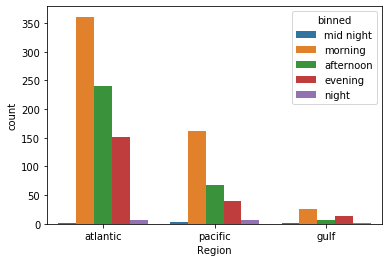

In [84]:
sns.countplot(x='Region', hue='binned', data=df)

<b>From the above graph it can be inferred that the shark attacks are predominant in the Atlantic region and mostly happen in the Morning time</b>

### Show the counts of observations in each "Area" bins rusing bars

In [85]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='Area' , data=df)
plt.xticks(rotation =90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

<b> From the above plot it can be inferred that most of the shark attacks taking place in USA are predominant in the Atlantic cost and occur during the morning time. The highest number of shark attacks happen in the state of "FLORIDA"</b>

In [86]:
##Replace occurrences of pattern/regex in the Series/Index with some other string
df.Sex=df.Sex.str.replace(" ", "")

In [87]:
#Replace the Missing Values or unwanted data with the mode 
df.Sex=df.Sex.fillna(df.Sex.mode())
df['Sex'].count()

1059

In [88]:
#Display the total number of Males and females in the dataset
df.Sex.value_counts()

M      817
F      241
lli      1
Name: Sex, dtype: int64

In [89]:
#Replace the occurence of the an other SEX category "lli" with the string 'M'
df.Sex=df.Sex.str.replace("lli","M")
df['Sex'].count()

1059

In [90]:
df.Sex.value_counts()

M    818
F    241
Name: Sex, dtype: int64

#### Plot a pie plot representating the numerical data in the "SEX" column. This function wraps matplotlib.pyplot.pie() for the specified column. 

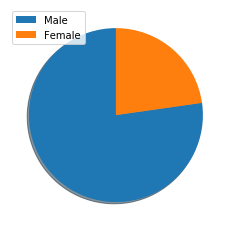

In [91]:
labels = ['Male', 'Female']
plt.pie(df.Sex.value_counts(), shadow=True, startangle=90)
plt.legend( labels)
plt.show()